In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
bo1=pd.read_csv(r"C:\Users\USER\Documents\GitHub\Employee-Burnout\Dataset\test.csv")
bo2=pd.read_csv(r"C:\Users\USER\Documents\GitHub\Employee-Burnout\Dataset\train.csv")


In [3]:
#Checking the first 5rows of both dataset
display(bo1.head())
display(bo2.head())

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
print(bo1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB
None


In [5]:
print(bo2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None


In [6]:
#checking for unique values
bo1.nunique()

Employee ID             12250
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
dtype: int64

In [7]:
bo2.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [8]:
#checking for null values
bo1.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [9]:
bo2.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [10]:
#filling the missing column with their mean value
bo2 = bo2.fillna(bo2.mean())
print("Are there any value missing now? "+str(bo2.isna().any().any()))

Are there any value missing now? False


C:\Users\USER\AppData\Local\Temp\ipykernel_8796\1551323366.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bo2 = bo2.fillna(bo2.mean())


In [11]:
bo2.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [12]:
#Renaming the column headers
bo1 = bo1.rename({'Date of Joining': 'Date_of_Joining',
                'Company Type': 'Service',
                'WFH Setup Available': 'remotely',
                'Resource Allocation': 'Resource_Allocation',
                'Mental Fatigue Score': 'Mental_Fatigue_Score',
                'Burn Rate': 'Burn_Rate'
               }, axis = 1)

In [13]:
bo2 = bo2.rename({'Date of Joining': 'Date_of_Joining',
                'Company Type': 'Service',
                'WFH Setup Available': 'remotely',
                'Resource Allocation': 'Resource_Allocation',
                'Mental Fatigue Score': 'Mental_Fatigue_Score',
                'Burn Rate': 'Burn_Rate'
               }, axis = 1)

In [14]:
bo1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
bo2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#one hot encoding
#coverting the non-binanry features to binary

In [16]:
bo1['Gender'] = bo2['Gender'].replace({'Male': 1,
                                     'Female': 0})

In [17]:
bo2['Gender'] = bo2['Gender'].replace({'Male': 1,
                                     'Female': 0})

In [18]:
bo1['Date_of_Joining'].agg([min, max])

min    2008-01-01
max    2008-12-31
Name: Date_of_Joining, dtype: object

In [19]:
bo2['Date_of_Joining'].agg([min, max])

min    2008-01-01
max    2008-12-31
Name: Date_of_Joining, dtype: object

In [20]:
bo1['Service'].value_counts()

Service    8004
Product    4246
Name: Service, dtype: int64

In [21]:
bo2['Service'].value_counts()

Service    14833
Product     7917
Name: Service, dtype: int64

In [22]:
bo1['Service'] = bo2['Service'].replace({'Service': 1,
                                       'Product': 0})

In [23]:
bo2['Service'] = bo2['Service'].replace({'Service': 1,
                                       'Product': 0})

In [24]:
bo1['remotely'].value_counts()

Yes    6638
No     5612
Name: remotely, dtype: int64

In [25]:
bo2['remotely'].value_counts()

Yes    12290
No     10460
Name: remotely, dtype: int64

In [26]:
bo1['remotely'] = bo1['remotely'].replace({'Yes': 1,
                                         'No': 0})

In [27]:
bo2['remotely'] = bo2['remotely'].replace({'Yes': 1,
                                         'No': 0})

In [28]:
bo1

,Employee ID,Date_of_Joining,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,1,1,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,0,0,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,1,1,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,0,1,0,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,1,1,1,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,0,1,1,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,0,1,0,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,1,1,0,3.0,6.0,6.7


In [29]:
bo2

,Employee ID,Date_of_Joining,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.000000,3.800000,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.000000,5.000000,0.36
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,4.481398,5.800000,0.49
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.000000,2.600000,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.000000,6.900000,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,0,1,0,1.0,3.000000,5.728188,0.41
22746,fffe33003000350031003800,2008-01-19,0,0,1,3.0,6.000000,6.700000,0.59
22747,fffe390032003000,2008-11-05,1,1,1,3.0,7.000000,5.728188,0.72
22748,fffe33003300320036003900,2008-01-10,0,1,0,2.0,5.000000,5.900000,0.52


In [30]:
test_data=bo1.copy()
#Dropping the Employee ID and Date of joining column
test_data.drop(['Date_of_Joining', "Employee ID"], axis=1, inplace=True)
bo2.drop(['Date_of_Joining', "Employee ID"], axis=1, inplace=True)

<AxesSubplot:>

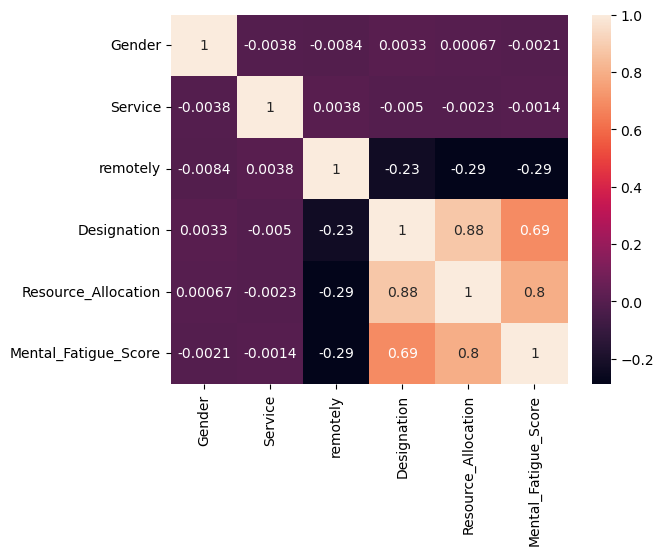

In [39]:
sns.heatmap(bo1.corr(), annot=True)

<AxesSubplot:>

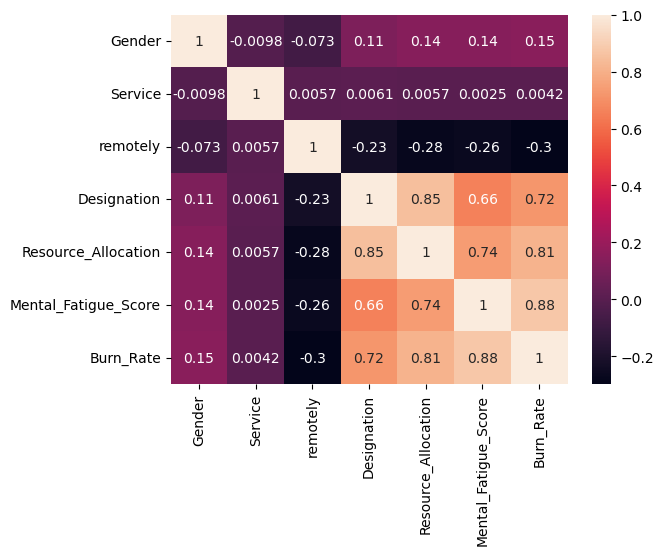

In [32]:
sns.heatmap(bo2.corr(), annot=True)


<AxesSubplot:xlabel='Mental_Fatigue_Score', ylabel='Burn_Rate'>

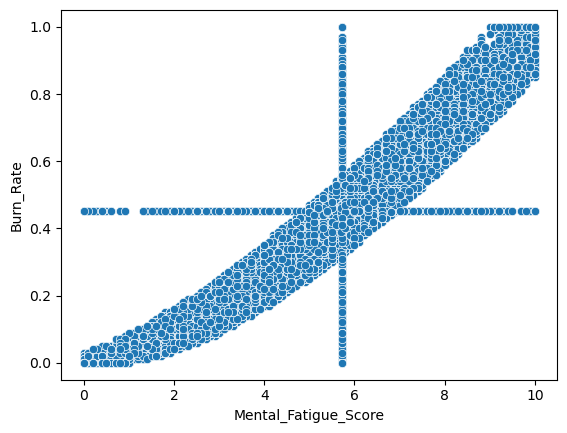

In [33]:
sns.scatterplot(x='Mental_Fatigue_Score',y='Burn_Rate', data=bo2)

In [34]:
#importing dependent and independent variables
x_train=bo2.iloc[:,:-1].values
y_train=bo2.iloc[:,-1].values
x_test=test_data.values
x_test

array([[0. , 1. , 0. , 2. , 5. , 7.7],
       [1. , 1. , 1. , 1. , 2. , 5.2],
       [0. , 0. , 1. , 1. , 3. , 5.9],
       ...,
       [0. , 1. , 0. , 4. , 7. , 9.6],
       [1. , 1. , 0. , 3. , 6. , 6.7],
       [1. , 1. , 0. , 2. , 2. , 2. ]])

#splitting the dataset into the train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
#fitting multiple linear reggresion to the training test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [36]:
#predicting the test set result
y_pred= regressor.predict(x_test)
print(y_pred)

[0.59836882 0.32975451 0.39837026 ... 0.79597205 0.5785679  0.14906605]


In [37]:
final_dataframe=bo1["Employee ID"]

In [38]:
final_dataframe2["Burn_rate"]=y_pred.values()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
final_dataframe